## **I. Perkenalan**
'''

=====================================================================

NAMA    : Achmad Nauvaldi

BATCH   : HCK-009

=====================================================================

'''

 **Link Dashboard :** 

**Problem Statement :** Apakah Genre dari sebuah Game dapat berpengaruh terhadap penjualan game

**Analisis **SMART** :**

    Specific (Spesifik): Menentukan genre game yang paling banyak disukai berdasarkan data penjualan.

    Measurable (Terukur): Pengukuran genre game yang pernah terjual dalam kurun waktu tertentu.

    Achievable (Dapat Dicapai): Melakukan penjualan game pada waktu tertentu dan mengumpulkan data penjualan game sehingga meningkatkan pendapatan perusahaan

    Relevant (Relevan): Penentuan genre game yang paling banyak disukai akan memberikan dampak kepada perusahaan game untuk mengarahkan pengembangan game kedepannnya.

    Time-bound (Terbatas Waktu): Tujuan akan disampaikan dalam bentuk laporan yang dapat diakses dalam waktu yang ditentukan.

**Latar Belakang :**

    Dalam beberapa tahun terakhir, industri permainan telah berkembang pesat dan menjadi salah satu industri hiburan yang paling menguntungkan di dunia. Oleh karena itu, memahami tren dan preferensi pemain dalam memilih genre game adalah faktor kunci dalam mengarahkan strategi pengembangan game yang sukses.

**Penjabaran masalah dengan metode 5W+1H:**

    Who (Siapa):
    Masalah ini berkaitan dengan pengembang game dan industri permainan.

    What (Apa):
    Masalah ini bertujuan untuk menentukan genre game yang paling banyak disukai berdasarkan total penjualan global.

    Where (Dimana):
    Penelitian ini akan berfokus pada data penjualan game di seluruh dunia.

    When (Kapan):
    Analisis ini akan mencakup periode waktu tertentu, untuk mengidentifikasi tren genre game yang paling banyak disukai.

    Why (Mengapa):
    Tujuan dari analisis ini adalah untuk memberikan wawasan kepada industri pengembang game tentang genre yang paling populer, sehingga mereka dapat mengarahkan upaya pengembangan mereka kedepannya.

    How (Bagaimana):
    Analisis akan dilakukan dengan mengumpulkan data penjualan global dari berbagai platform dan mengelompokkannya berdasarkan genre. Kemudian, genre dengan total penjualan tertinggi akan diidentifikasi sebagai genre yang paling banyak disukai. Analisis statistik dan visualisasi data mungkin digunakan untuk mendukung temuan ini.


## **III. Data Loading**

URL SUMBER DATASET : ***https://www.kaggle.com/datasets/gregorut/videogamesales***

Rank = Ranking of overall sales

Name = The games name

Platform = Platform of the games release (i.e. PC,PS4, etc.)

Year = Year of the game's release

Genre = Genre of the game

Publisher = Publisher of the game

NA_Sales = Sales in North America (in millions)

EU_Sales = Sales in Europe (in millions)

JP_Sales = Sales in Japan (in millions)

Other_Sales = Sales in the rest of the world (in millions)

Global_Sales = Total worldwide sales.

In [2]:
# Mengimport Modul dan Pustaka yang akan dipakai untuk melakukan penelitian
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Membaca file CSV 'vgsales.csv' dan memuatnya ke dalam DataFrame 'df'
df = pd.read_csv('vgsales.csv')
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


data yang digunakan memiliki 16,598 baris (rows) dan 11 kolom (columns)

In [3]:
df.info()
#melihat info dasar dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Jenis data dalam DataFrame meliputi float64 (untuk data angka), int64 (untuk data angka berjenis integer), dan object (untuk data teks atau string).

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y', errors='coerce')
# Mengubah kolom 'Year' menjadi tipe data datetime dengan format 'YYYY' (tahun)

In [5]:
# Mengambil daftar genre yang unik dari kolom 'Genre' dalam DataFrame 'df'
genre = df['Genre'].unique()

# Menampilkan daftar genre yang unik
print("Genre = ", genre)

Genre =  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          16598 non-null  int64         
 1   Name          16598 non-null  object        
 2   Platform      16598 non-null  object        
 3   Year          16327 non-null  datetime64[ns]
 4   Genre         16598 non-null  object        
 5   Publisher     16540 non-null  object        
 6   NA_Sales      16598 non-null  float64       
 7   EU_Sales      16598 non-null  float64       
 8   JP_Sales      16598 non-null  float64       
 9   Other_Sales   16598 non-null  float64       
 10  Global_Sales  16598 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


Saya telah memfilternya agar data digunakan pada waktu yang tepat

In [7]:
# Membuat DataFrame baru 'FTahun' yang berisi data dengan tahun di antara 2012 dan 2017
FTahun = df[(df['Year'] >= '2012-01-01') & (df['Year'] <= '2017-12-31')]

# Menampilkan DataFrame 'FTahun' yang berisi data yang sesuai dengan rentang tahun yang diinginkan
print(FTahun)

        Rank                                               Name Platform  \
16        17                                 Grand Theft Auto V      PS3   
23        24                                 Grand Theft Auto V     X360   
32        33                                Pokemon X/Pokemon Y      3DS   
33        34                          Call of Duty: Black Ops 3      PS4   
34        35                         Call of Duty: Black Ops II      PS3   
...      ...                                                ...      ...   
16569  16572                                 Resident Evil 4 HD     XOne   
16570  16573                      Farming 2017 - The Simulation      PS4   
16571  16574         Grisaia no Kajitsu: La Fruit de la Grisaia      PSP   
16576  16579                                  Rugby Challenge 3     XOne   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

            Year         Genre             Publisher  NA_Sales  EU_Sales  \
16    2013-

Tipe tahun yang muncul tidak sesuai dengan tipe data yang akan digunakan nantinya sehingga harus diubah kembali

In [8]:
# Mengubah kolom 'Year' menjadi tipe data datetime
FTahun['Year'] = pd.to_datetime(FTahun['Year'])

# Mengambil tahun (integer) dari kolom 'Year' dan menyimpannya kembali di kolom 'Year'
FTahun['Year'] = FTahun['Year'].dt.year

# Menampilkan DataFrame 'FTahun' dengan kolom 'Year' yang sudah diubah menjadi tahun (integer)
print(FTahun)

        Rank                                               Name Platform  \
16        17                                 Grand Theft Auto V      PS3   
23        24                                 Grand Theft Auto V     X360   
32        33                                Pokemon X/Pokemon Y      3DS   
33        34                          Call of Duty: Black Ops 3      PS4   
34        35                         Call of Duty: Black Ops II      PS3   
...      ...                                                ...      ...   
16569  16572                                 Resident Evil 4 HD     XOne   
16570  16573                      Farming 2017 - The Simulation      PS4   
16571  16574         Grisaia no Kajitsu: La Fruit de la Grisaia      PSP   
16576  16579                                  Rugby Challenge 3     XOne   
16589  16592  Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...      PSV   

       Year         Genre             Publisher  NA_Sales  EU_Sales  JP_Sales  \
16    

/var/folders/k0/26hz1rqj10d8q0hysjs76hz00000gn/T/ipykernel_9938/2871211509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTahun['Year'] = pd.to_datetime(FTahun['Year'])
/var/folders/k0/26hz1rqj10d8q0hysjs76hz00000gn/T/ipykernel_9938/2871211509.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FTahun['Year'] = FTahun['Year'].dt.year


In [9]:
# Mencari data duplikat dalam DataFrame 'FTahun'
duplicate = FTahun[FTahun.duplicated()]

# Menampilkan data-data yang duplikat
print("Duplicate Data:")
duplicate

Duplicate Data:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Hasil pengecekan duplikat kembali kosong sehingga tidak ada tindak lanjut

In [10]:
FTahun.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       6
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Dari hasil  pengecekan data null ternyata terdapat 6 data null  pada tabel Publisher sehingga perlu dihilangkan agar tidak mempengaruhi target kedepannya.

In [11]:
# Menghapus baris-baris dengan nilai-nilai yang hilang dari DataFrame 'FTahun'
FTahun = FTahun.dropna()

# Memeriksa jumlah nilai-nilai yang hilang setelah penghapusan
FTahun.isnull().sum()


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [12]:
# Menyimpan DataFrame 'FTahun' ke dalam file CSV dengan nama 'NewData.csv'
FTahun.to_csv('cleanData.csv', index=False)

print('Data Berhasil Disimpan')

Data Berhasil Disimpan


## **V. Analisis dan Perhitungan**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mengimpor DataFrame dari file CSV 'cleanData.csv' menggunakan pandas
df = pd.read_csv('cleanData.csv')


## **Statistik Deskriptif**

In [14]:
# Mengelompokkan data berdasarkan genre dan menghitung total penjualan global per genre
genre_sales = df.groupby('Genre')['Global_Sales'].sum().reset_index()

# Menampilkan data total penjualan global per genre
print(genre_sales)

# Menampilkan statistik deskriptif dari kolom 'Global_Sales' dalam genre_sales
print(genre_sales['Global_Sales'].describe())

# Menemukan genre dengan total penjualan tertinggi
top_genre = genre_sales[genre_sales['Global_Sales'] == genre_sales['Global_Sales'].max()]
print("Genre dengan Total Penjualan Tertinggi:", top_genre['Genre'].values[0])
print("Total Penjualan Global:", top_genre['Global_Sales'].values[0])

           Genre  Global_Sales
0         Action        436.86
1      Adventure         28.48
2       Fighting         44.51
3           Misc         85.11
4       Platform         60.66
5         Puzzle          4.94
6         Racing         53.75
7   Role-Playing        181.82
8        Shooter        286.03
9     Simulation         33.61
10        Sports        175.28
11      Strategy         12.97
count     12.000000
mean     117.001667
std      131.458825
min        4.940000
25%       32.327500
50%       57.205000
75%      176.915000
max      436.860000
Name: Global_Sales, dtype: float64
Genre dengan Total Penjualan Tertinggi: Action
Total Penjualan Global: 436.86


terdapat 12 genre yang diamati dari data yang diamati, Genre-game ini mencakup beragam jenis mulai dari game Action hingga game Strategy. Total penjualan game secara global dalam dataset ini mencapai angka rata-rata sekitar 117 juta unit, dengan penjualan tertinggi mencapai 436.86 juta unit (Genre Action) yang membuatnya menjadi game paling disukai dan penjualan terendah sekitar 4.94 juta unit (Genre Puzzle). Perbedaan dalam total penjualan antara genre-game sangat signifikan. Selain (Action), beberapa genre lain yang juga memiliki total penjualan tinggi adalah (Shooter) 286.03 juta unit, (Sports) 175.28 juta unit. Di sisi lain, genre seperti (Puzzle) 4.94 juta unit dan (Strategy) 12.97 juta unit, dan memiliki total penjualan yang jauh lebih rendah.
Dari Rata-rata total penjualan global genre-game sekitar 117 juta unit, dengan deviasi standar yang cukup besar sekitar 131.46, Ini menunjukkan adanya variasi yang signifikan dalam penjualan antara genre-game.

Kuartil bawah (25%) adalah 32.33 juta unit, kuartil tengah (50%) 57.21 juta unit, dan kuartil atas (75%) sekitar 176.92 juta unit. Rentang penjualan antara nilai minimum (4.94 juta unit) hingga maksimum (436.86 juta unit) juga sangat luas.

In [16]:
# Memilih data penjualan global hanya untuk genre 'Action'
genre_action_data = df[df['Genre'] == 'Action']['Global_Sales']

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3) dari data 'Global_Sales'
q1 = genre_action_data.quantile(0.25)
q3 = genre_action_data.quantile(0.75)

# Menghitung interquartile range (IQR)
iqr = q3 - q1

# Menghitung batas atas (upper boundary) dan batas bawah (lower boundary) untuk menentukan outlier
up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

# Menampilkan nilai batas atas dan batas bawah
print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 1.01
Lower Boundary: -0.54


data yang berada di luar rentang ini dianggap sebagai nilai ekstrim atau outlier untuk genre 'Action'.

In [17]:
# Mengidentifikasi data penjualan global yang dianggap sebagai outlier
outlier = genre_action_data[(genre_action_data < low_bound) | (genre_action_data > up_bound)]

# Mengidentifikasi data penjualan global yang bukan outlier
no_outlier = genre_action_data[(genre_action_data >= low_bound) & (genre_action_data <= up_bound)]

# Menghitung persentase outlier dalam data genre 'Action'
percentage_of_outliers = len(outlier) * 100 / len(genre_action_data)

print(f'Percentage of outliers: {percentage_of_outliers:.2f}%')

Percentage of outliers: 10.17%


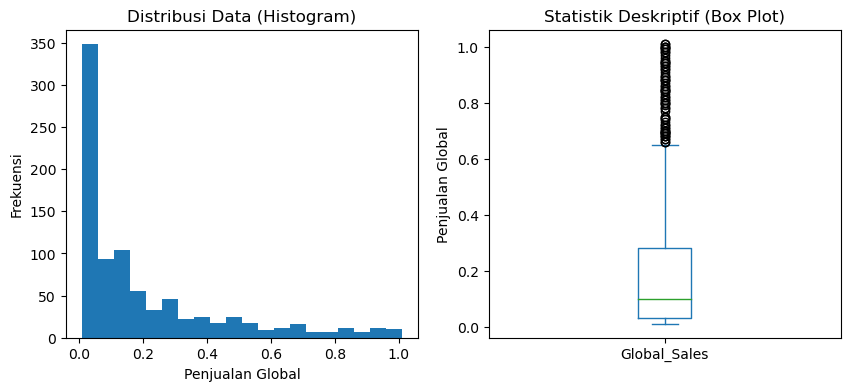

In [18]:
# Membuat gambar dengan dua subplot bersebelahan
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))

# Membuat histogram dari data 'no_outlier' dan menampilkannya di subplot pertama
no_outlier.plot(kind='hist', bins=20, ax=ax[0])
ax[0].set_title('Distribusi Data (Histogram)')
ax[0].set_xlabel('Penjualan Global')
ax[0].set_ylabel('Frekuensi')

# Membuat box plot dari data 'no_outlier' dan menampilkannya di subplot kedua
no_outlier.plot(kind='box', ax=ax[1])
ax[1].set_title('Statistik Deskriptif (Box Plot)')
ax[1].set_ylabel('Penjualan Global')

plt.show()

Persentase outlier pada data genre“Action” adalah sekitar 10,17, melebihi batas atas (upperbound) sebesar 1,01 dan lebih kecil dari batas bawah (lower limit) sebesar -0,54.
Hal ini menunjukkan bahwa beberapa data penjualan pada kategori “Action” berada di luar rentang normal (melebihi batas atas dan  bawah), yang dapat mempengaruhi analisis. jadi saya memilih untuk menghapus outlier ini karena mempengaruhi penelitian.

Saya menggunakan Tukey Rule  karena normalisasi ini efektif dalam menangani data skewness tanpa harus mengubah data ke distribusi normal standar.

 **visualisasi 4 data lainya**

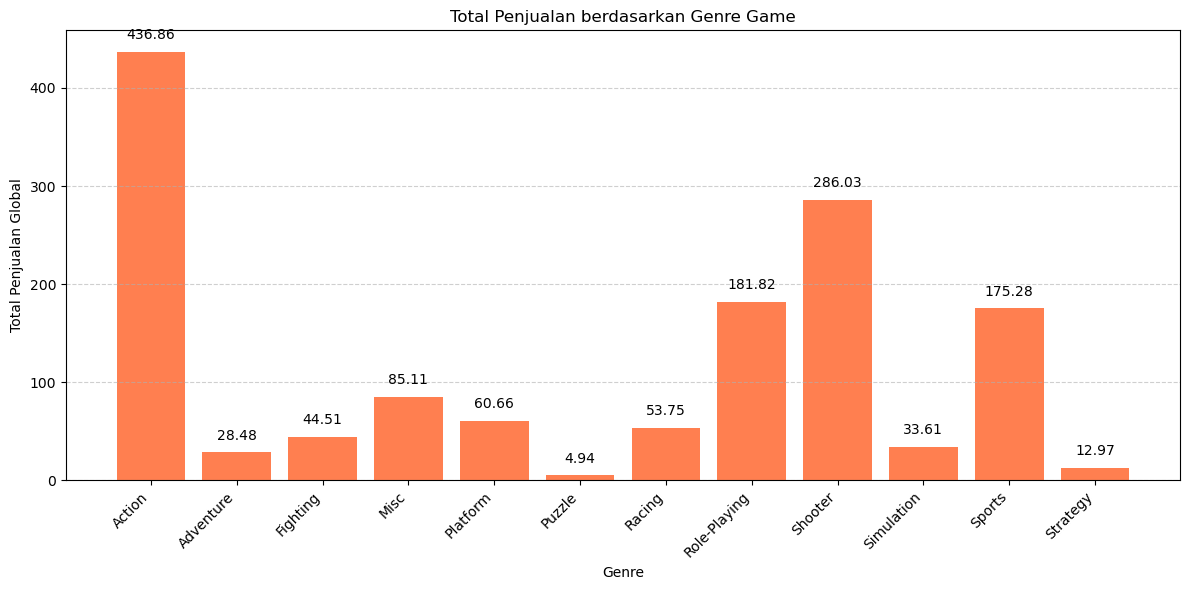

In [19]:
genre = ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy']
global_sales = [436.86, 28.48, 44.51, 85.11, 60.66, 4.94, 53.75, 181.82, 286.03, 33.61, 175.28, 12.97]

plt.figure(figsize=(12, 6))

# Membuat grafik batang dengan genre sebagai sumbu x dan total penjualan global sebagai sumbu y
plt.bar(genre, global_sales, color='coral')

# Menambahkan label pada sumbu x dan y serta judul grafik
plt.xlabel('Genre')
plt.ylabel('Total Penjualan Global')
plt.title('Total Penjualan berdasarkan Genre Game')

# Mengatur rotasi label pada sumbu x agar terbaca dengan baik
plt.xticks(rotation=45, ha="right")

# Menambahkan grid pada sumbu y dengan garis putus-putus dan transparansi 0.6
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Menambahkan nilai angka di atas batang grafik
for i, v in enumerate(global_sales):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Game bergenre “Action” mempunyai total pendapatan tertinggi dengan nilai kurang lebih 436,86 juta unit. Hal ini menunjukkan bahwa game bergenre “Action” cenderung digandrungi oleh para gamer dan memberikan dampak yang signifikan terhadap pendapatan global.

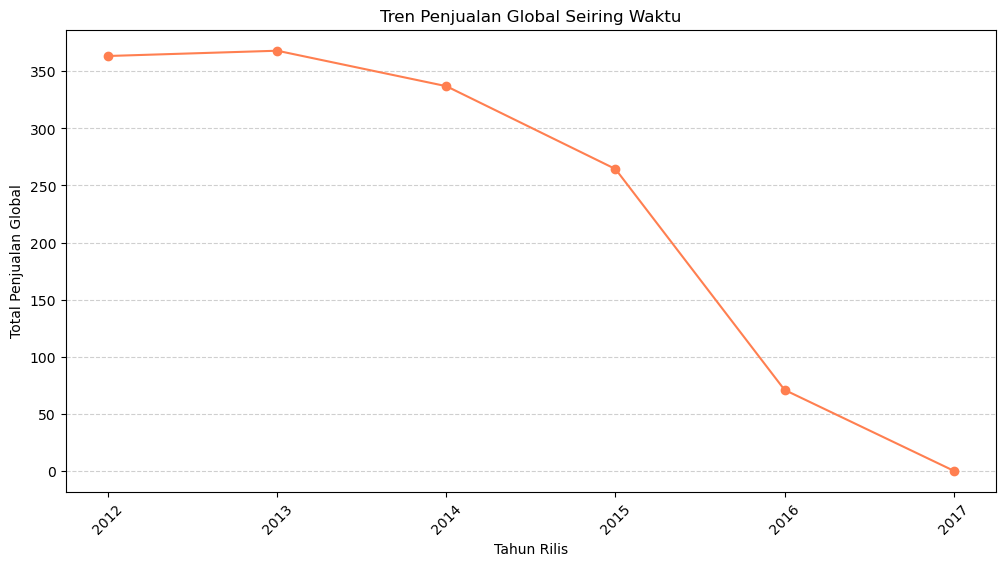

In [20]:
tren_penjualan = df.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))

# Membuat grafik garis dengan tahun rilis sebagai sumbu x dan total penjualan global sebagai sumbu y
plt.plot(tren_penjualan.index, tren_penjualan.values, marker='o', color='coral', linestyle='-')

# Menambahkan label pada sumbu x dan y serta judul grafik
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Penjualan Global')
plt.title('Tren Penjualan Global Seiring Waktu')

# Menambahkan grid pada sumbu y dengan garis putus-putus dan transparansi 0.6
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Mengatur rotasi label pada sumbu x agar terbaca dengan baik
plt.xticks(rotation=45)

plt.show()

Tren penjualan game global  yang dapat disimpulkan dari data ini antara lain:


Berdasarkan data awal, tren penjualan game masih sangat kuat dan seiring berjalannya waktu data penjualan berangsur menurun  dan pada tahun 2016 terjadi penurunan yang sangat tajam hingga tahun 2017.

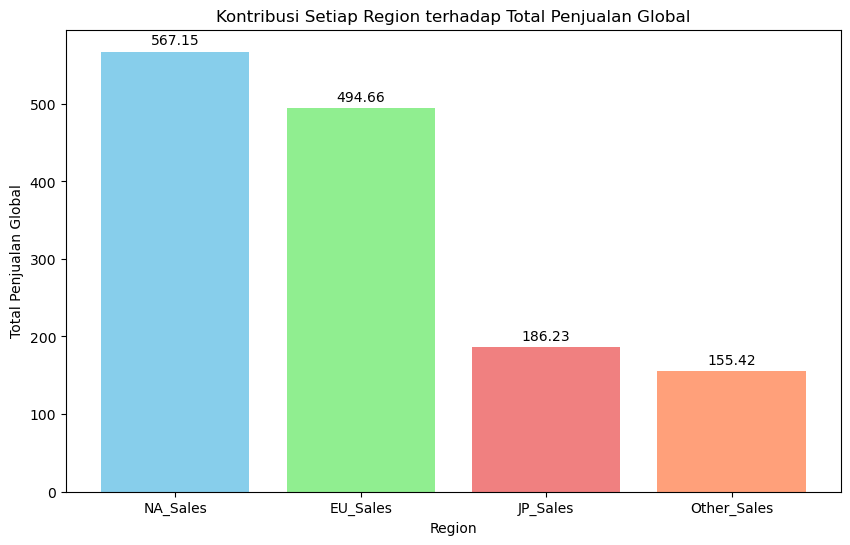

In [21]:

# Menentukan daftar region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Menghitung total penjualan global untuk setiap region
total_penjualan = df[regions].sum()

# Mengambil label dari setiap region
labels = total_penjualan.index

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(10, 6))

# Membuat grafik batang dengan label region pada sumbu x dan total penjualan global pada sumbu y, dengan warna yang berbeda untuk setiap region
bars = plt.bar(labels, total_penjualan, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])

# Menambahkan label pada sumbu x dan y serta judul grafik
plt.xlabel('Region')
plt.ylabel('Total Penjualan Global')
plt.title('Kontribusi Setiap Region terhadap Total Penjualan Global')

# Menambahkan label nilai di atas setiap batang
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(round(total_penjualan[i], 2)), ha='center', va='bottom')

plt.show()

Amerika Utara (NA_Sales) adalah kontributor utama penjualan global game dengan total penjualan sekitar 567,17 juta unit, diikuti oleh Eropa (EU_Sales) dengan total penjualan sekitar 494,66 juta unit. sedangkan Jepang (JP_Sales) memiliki kontribusi penjualan yang lebih rendah, sekitar 186,23 juta unit, sementara wilayah lainnya (Other_Sales) mencapai total penjualan sekitar 155,42 juta unit.

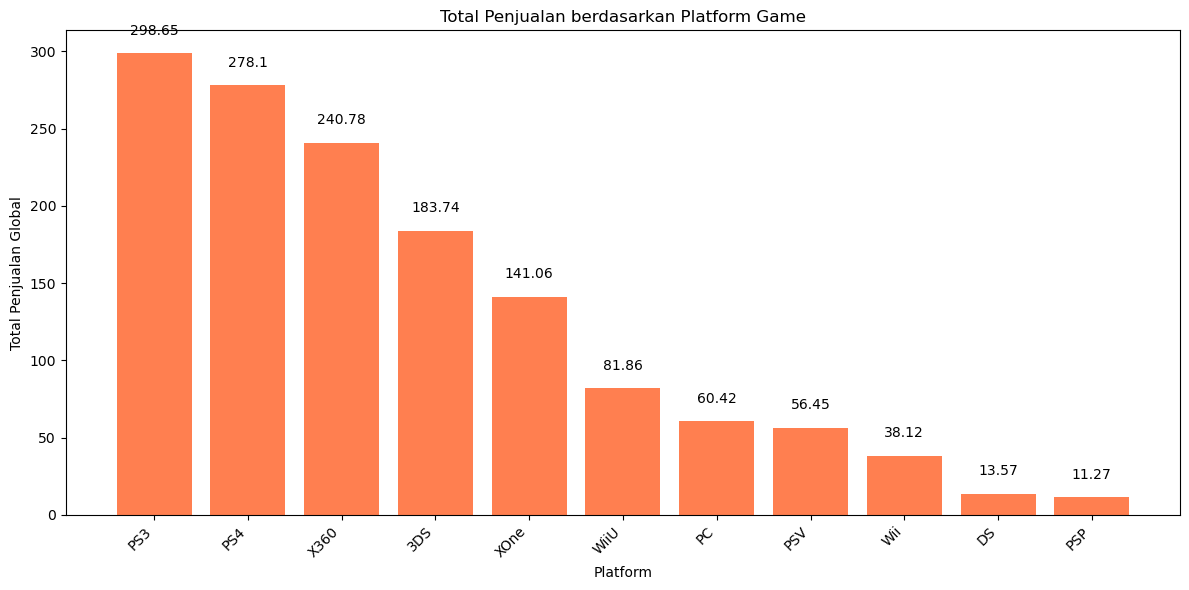

In [22]:
# Mengelompokkan data berdasarkan platform dan menghitung total penjualan global untuk setiap platform
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Membuat gambar dengan ukuran tertentu
plt.figure(figsize=(12, 6))

# Membuat grafik batang dengan label platform pada sumbu x dan total penjualan global pada sumbu y, dengan warna biru
plt.bar(platform_sales.index, platform_sales.values, color='coral')

# Menambahkan label pada sumbu x dan y serta judul grafik
plt.xlabel('Platform')
plt.ylabel('Total Penjualan Global')
plt.title('Total Penjualan berdasarkan Platform Game')

# Mengatur rotasi label sumbu x agar mudah dibaca
plt.xticks(rotation=45, ha="right")

# Menambahkan label nilai di atas setiap batang
for i, v in enumerate(platform_sales):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

# Menampilkan grafik
plt.tight_layout()
plt.show()

Platfrom game yang paling banyak penjualanya di pasar global adalah PS3 (298), PS4 (278), X360 (240.78) dan yang paling sedikit dalah PSP(11.27)

Hipotesis Nol (H0): Genre game tidak berpengaruh secara signifikan pada penjualan game secara global.

Hipotesis Alternatif (H1): Genre game berpengaruh secara signifikan pada penjualan game secara global.

Uji Statistik: ANOVA (Analysis of Variance).

ANOVA memberikan nilai F-statistik dan p-value yang membantu saya menentukan apakah perbedaan antar kelompok adalah hasil dari variasi yang signifikan atau hanya kebetulan.

In [23]:
from scipy.stats import f_oneway

genre_groups = []
for genre in df['Genre']:
    genre_groups.append(df[df['Genre'] == genre]['Global_Sales'])

f_statistic, p_value = f_oneway(*genre_groups)

print("Hasil ANOVA:")
print("Nilai F-statistic:", f_statistic)
print("Nilai p-value:", p_value)

alpha = 0.05 
if p_value < alpha:
    print("Kesimpulan: Terdapat perbedaan signifikan dalam penjualan global antara genre-game yang berbeda.")
else:
    print("Kesimpulan: Tidak terdapat perbedaan signifikan dalam penjualan global antara genre-game yang berbeda.")

Hasil ANOVA:
Nilai F-statistic: 11.91856426078657
Nilai p-value: 0.0
Kesimpulan: Terdapat perbedaan signifikan dalam penjualan global antara genre-game yang berbeda.


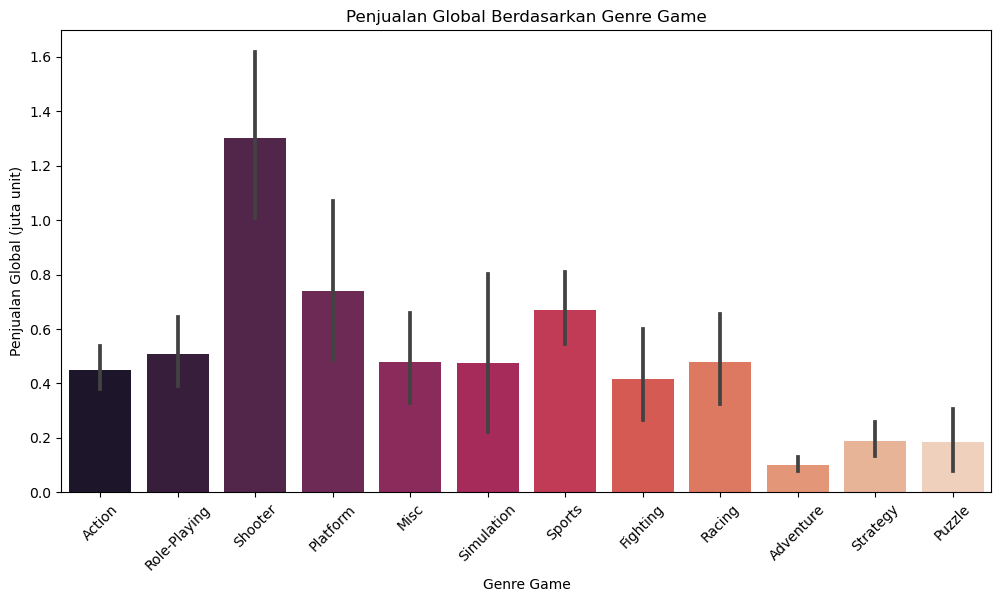

In [24]:
# Mengatur ukuran gambar plot
plt.figure(figsize=(12, 6))

# Membuat grafik batang (barplot) dengan Genre sebagai sumbu x dan Global_Sales sebagai sumbu y
sns.barplot(x='Genre', y='Global_Sales', data=df, palette='rocket')

# Memutar label sumbu x sebesar 45 derajat untuk meningkatkan keterbacaan
plt.xticks(rotation=45)

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('Genre Game')
plt.ylabel('Penjualan Global (juta unit)')

# Menambahkan judul grafik
plt.title('Penjualan Global Berdasarkan Genre Game')

plt.show()

hasil uji statistik menunjukkan bahwa genre game memiliki pengaruh yang signifikan terhadap penjualan game secara global. 

saya memilih metode korelasi Spearman karena data yang saya punya tidak terdistribusi dengan begitu normal. jadi saya berasumsi bahwa metode korelasi Spearman adalah pilihan yang tepat.

In [25]:
from scipy.stats import spearmanr

genre_sales = df[['Genre', 'Global_Sales']]

# Hitung korelasi Spearman
correlation, p_value = spearmanr(genre_sales['Genre'], genre_sales['Global_Sales'])

# Tampilkan hasil korelasi dan p-value
print(f'Korelasi Spearman: {correlation:.2f}')
print(f'P-Value: {p_value:.4f}')

Korelasi Spearman: 0.13
P-Value: 0.0000


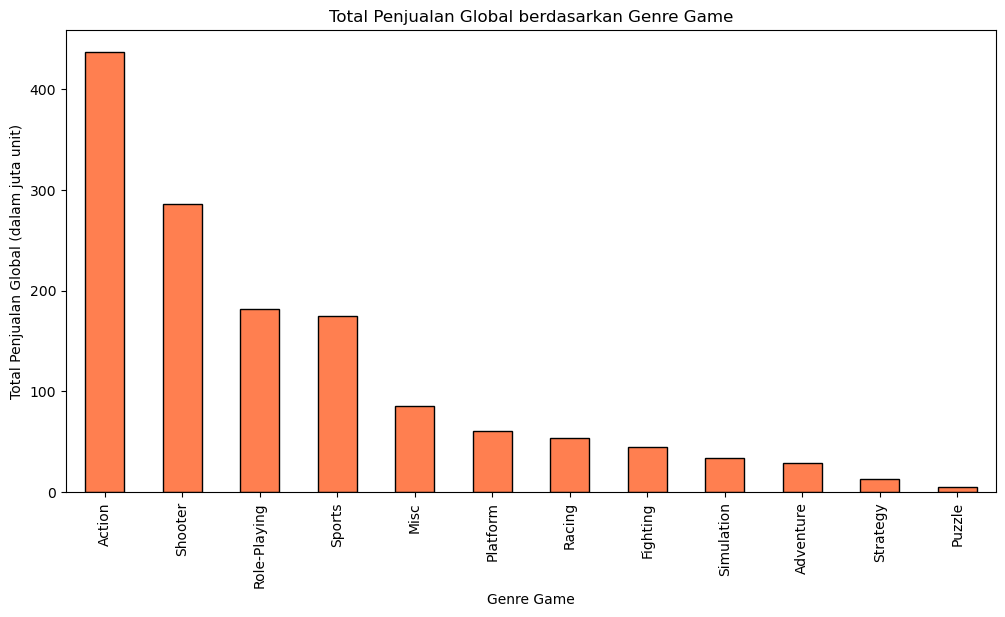

In [26]:
genre_sales = df[['Genre', 'Global_Sales']]

# Hitung total penjualan global untuk setiap genre
total_sales_by_genre = genre_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Buat diagram batang bertumpuk
plt.figure(figsize=(12, 6))
total_sales_by_genre.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Total Penjualan Global berdasarkan Genre Game')
plt.xlabel('Genre Game')
plt.ylabel('Total Penjualan Global (dalam juta unit)')
plt.xticks(rotation=90)
plt.show()

Nilai korelasi Spearman sebesar 0.13 mengindikasikan adanya hubungan positif antara genre game dan penjualan global, P-value yang sangat rendah (0.0000) menunjukkan bahwa korelasi ini signifikan secara statistik.
Tapi harus diingat bahwa nilai korelasi sebesar 0.13 menunjukkan bahwa hubungan ini masih relatif lemah, meskipun signifikan secara statistik.

## **VI. Kesimpulan**

**Kesimpulan:**

    1. Genre game "Action" memiliki total penjualan tertinggi dengan nilai sekitar 436.86 juta unit. Ini menunjukkan bahwa game-game dalam genre "Action" cenderung menjadi favorit pemain dan memiliki dampak signifikan pada penjualan global.

    2. Tren penjualan global game menunjukkan pertumbuhan awal yang kuat, namun kemudian mengalami penurunan signifikan, khususnya pada tahun 2016 dan 2017.

    3. Amerika Utara (NA_Sales) adalah kontributor utama penjualan global game, diikuti oleh Eropa (EU_Sales), sementara Jepang (JP_Sales) memiliki kontribusi yang lebih rendah.

    4. Platform game seperti PS3, PS4, dan X360 adalah yang paling sukses dalam hal penjualan global, sedangkan PSP memiliki penjualan yang lebih rendah.

**Rekomendasi:**

    Pengembang game sebaiknya dapat lebih fokus pada genre "Action" atau mempertimbangkan untuk mengembangkan game dalam genre ini, mengingat popularitasnya yang tinggi.

    Perusahaan game dapat memprioritaskan pemasaran dan pengembangan game di Amerika Utara dan Eropa sebagai pasar utama dengan peluang pertumbuhan yang signifikan.

    Diversifikasi pasar ke wilayah-wilayah dengan penjualan lebih rendah seperti Jepang atau wilayah lainnya dapat menjadi strategi untuk meningkatkan penjualan global secara keseluruhan.

    Pengembang game dapat terus mengembangkan game untuk platform-platform yang telah terbukti sukses seperti PS3, PS4, dan X360, sambil mempertimbangkan peluang di platform lain.

### Link Tableau

https://public.tableau.com/app/profile/achmad.nauvaldi/vizzes